## Exploratory Analysis FPC-11 Species : Rhodomonas Salina

Fifty Days of senser and actuators data from 12/12/2021 to 31/01/2022

Dataset Description : 

1: FPC11-12_12_21_to_31_01_22_light_temp_ph.csv   - file contain readings of light, temparature, and PH measurements from PBR unit FPC11

   - Light: input value

   - Temparature: Input value
   
   - PH value : Sensor Output

2: FPC11-12_12_21_to_31_01_22_productivity_efficiencycsv.csv    -  file contain calculated productivity and efficiency of the PBR sytem based on Co2 consumption

3: FPC11-13_12_21_to_31_01_22_flow_and_pressure.csv   - sensor measurements of pressure and flowrate from the PBR FPC11 

##### FPC11-12_12_21_to_31_01_22_light_temp_ph.csv ----- Preprocessing & Data cleaning

In [5]:
import os   # for interacting with the operating system,  include many functions to interact with the file system
import numpy as np  # Python library used for working with arrays
import pandas as pd  #data manipulation and analysis
import matplotlib as mpl
import matplotlib.pyplot as plt  # for visualization
from sklearn.model_selection import train_test_split   # data preprossesing - train and test split, ML algorithm package
import seaborn as sns  # for visualization
import matplotlib.pylab as pylt
from scipy import stats
%matplotlib inline

ModuleNotFoundError: No module named 'numpy'

In [6]:
import warnings    # to avoid warning during executions
warnings.filterwarnings("ignore")

In [3]:
#df = pandas.read_csv('hrdata.csv', 
            #index_col='Employee', 
            #parse_dates=['Hired'], 
            #header=0, 
            #names=['Employee', 'Hired','Salary', 'Sick Days'])


#print(crm_rawdata.dtypes)
#list(crm_rawdata.columns)
#crm_rawdata.columns.values.tolist()

In [7]:
fpc11_raw_data_light_temp_ph = pd.read_csv('Raw_data\FPC11-12_12_21_to_31_01_22_light_temp_ph.csv',
                                            sep=';',
                                            names=['Date_Time', 'us', 'QT','QC', 'QB', 'QR', 'QG', 'QT_corr', 'TT0', 'TT1', 'pH', 'C_PAR'])

fpc11_raw_data_light_temp_ph = fpc11_raw_data_light_temp_ph.iloc[1: , :]

FileNotFoundError: [Errno 2] No such file or directory: 'Raw_data\\FPC11-12_12_21_to_31_01_22_light_temp_ph.csv'

In [5]:
fpc11_raw_data_light_temp_ph.head()

,Date_Time,us,QT,QC,QB,QR,QG,QT_corr,TT0,TT1,pH,C_PAR
1,12/12/2021 10:41:24,0,73.0961,100,100,100,100,-384.457,21.3,19.2444,14.9,0
2,12/12/2021 11:14:00,0,73.0557,100,100,100,100,-384.474,21.2746,19.4091,14.9,0
3,12/12/2021 11:46:36,0,73.0341,100,100,100,100,-384.491,21.4845,19.6082,14.9001,0
4,12/12/2021 12:19:12,0,73.0688,100,100,100,100,-384.508,21.3992,19.4752,14.9,0
5,12/12/2021 12:51:48,0,72.9612,100,100,100,100,-384.524,21.5431,19.6326,14.9,0


In [6]:
fpc11_raw_data_light_temp_ph.tail()

,Date_Time,us,QT,QC,QB,QR,QG,QT_corr,TT0,TT1,pH,C_PAR
2204,31/01/2022 07:39:12,0,72.9858,100,100,100,100,-421.88,21.6135,20.0899,14.9271,0
2205,31/01/2022 08:11:48,0,73.0961,100,100,100,100,-421.896,21.3811,19.6445,14.9,0
2206,31/01/2022 08:44:24,0,73.1057,100,100,100,100,-421.913,21.2822,19.5454,14.9157,0
2207,31/01/2022 09:17:00,0,73.1584,100,100,100,100,-421.931,21.1012,19.196,14.9,0
2208,31/01/2022 09:49:36,0,73.1772,100,100,100,100,-421.96,21.107,19.1386,14.9,0


In [7]:
fpc11_raw_data_light_temp_ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 1 to 2208
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date_Time  2208 non-null   object
 1   us         2208 non-null   object
 2   QT         2208 non-null   object
 3   QC         2208 non-null   object
 4   QB         2208 non-null   object
 5   QR         2208 non-null   object
 6   QG         2208 non-null   object
 7   QT_corr    2208 non-null   object
 8   TT0        2208 non-null   object
 9   TT1        2208 non-null   object
 10  pH         2208 non-null   object
 11  C_PAR      2208 non-null   object
dtypes: object(12)
memory usage: 207.1+ KB


In [8]:
print(type(fpc11_raw_data_light_temp_ph))
print(fpc11_raw_data_light_temp_ph.shape)

<class 'pandas.core.frame.DataFrame'>
(2208, 12)


In [9]:
list(fpc11_raw_data_light_temp_ph.columns)


['Date_Time',
 'us',
 'QT',
 'QC',
 'QB',
 'QR',
 'QG',
 'QT_corr',
 'TT0',
 'TT1',
 'pH',
 'C_PAR']

In [10]:
print(fpc11_raw_data_light_temp_ph.isnull().values.any())
print(fpc11_raw_data_light_temp_ph.isnull().sum().sum())

False
0


In [11]:
fpc11_raw_data_light_temp_ph.describe()

,Date_Time,us,QT,QC,QB,QR,QG,QT_corr,TT0,TT1,pH,C_PAR
count,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
unique,2208,1,1821,1,1,1,1,2208,1900,2101,436,8
top,12/12/2021 10:41:24,0,72.9,100,100,100,100,-384.457,21,18.9257,14.9,38.4
freq,1,2208,39,2208,2208,2208,2208,1,50,3,984,948


In [12]:
fpc11_raw_data_light_temp_ph = fpc11_raw_data_light_temp_ph.drop(['us'], axis = 1)
fpc11_raw_data_light_temp_ph.describe()

,Date_Time,QT,QC,QB,QR,QG,QT_corr,TT0,TT1,pH,C_PAR
count,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
unique,2208,1821,1,1,1,1,2208,1900,2101,436,8
top,12/12/2021 10:41:24,72.9,100,100,100,100,-384.457,21,18.9257,14.9,38.4
freq,1,39,2208,2208,2208,2208,1,50,3,984,948


In [13]:
fpc11_raw_data_light_temp_ph.to_csv(r'processed_data/FPC11_light_temp_ph.csv', index = False)

In [14]:
fpc11_TS_light_temp_ph = pd.read_csv("processed_data\FPC11_light_temp_ph.csv", parse_dates=True, index_col = "Date_Time")
fpc11_TS_light_temp_ph.head()

,QT,QC,QB,QR,QG,QT_corr,TT0,TT1,pH,C_PAR
Date_Time,,,,,,,,,,
2021-12-12 10:41:24,73.0961,100,100,100,100,-384.457,21.3000,19.2444,14.9000,0.0
2021-12-12 11:14:00,73.0557,100,100,100,100,-384.474,21.2746,19.4091,14.9000,0.0
2021-12-12 11:46:36,73.0341,100,100,100,100,-384.491,21.4845,19.6082,14.9001,0.0
2021-12-12 12:19:12,73.0688,100,100,100,100,-384.508,21.3992,19.4752,14.9000,0.0
2021-12-12 12:51:48,72.9612,100,100,100,100,-384.524,21.5431,19.6326,14.9000,0.0


========================================================================================

##### FPC11-12_12_21_to_31_01_22_productivity_efficiencycsv.csv - Data cleaning and Preproccesing

In [15]:
FPC11_12_12_21_to_31_01_22_productivity_efficiencycsv = pd.read_csv('Raw_data\FPC11-12_12_21_to_31_01_22_productivity_efficiencycsv.csv',
                                            sep=';')

In [16]:
FPC11_12_12_21_to_31_01_22_productivity_efficiencycsv.head()

,Date_Time,us,LReactor,C_g,C_Eff,C_CD,T_CD,C_D_g,C_D_Eff,C_PAR
0,12/12/2021 10:41:24,0,1.32737,0.065081,0.0,0.066638,0,1.15274,0,0.0
1,12/12/2021 11:14:00,0,1.32737,-0.000284,0.0,0.071367,0,-0.0160186,0,0.0
2,12/12/2021 11:46:36,0,1.32737,-0.000068,0.0,0.070516,0,-0.0555785,0,0.0
3,12/12/2021 12:19:12,0,1.32737,-0.000190,0.0,0.069610,0,-0.0976433,0,0.0
4,12/12/2021 12:51:48,0,1.32737,-0.000009,0.0,0.069038,0,-0.124244,0,0.0


In [17]:
FPC11_12_12_21_to_31_01_22_productivity_efficiencycsv.tail()

,Date_Time,us,LReactor,C_g,C_Eff,C_CD,T_CD,C_D_g,C_D_Eff,C_PAR
2203,31/01/2022 07:39:12,0,7.1648,-0.007245,0.0,1.54820,0,22.7521,3.05137,0.0
2204,31/01/2022 08:11:48,0,7.1648,-0.002446,0.0,1.54768,0,22.7336,3.04888,0.0
2205,31/01/2022 08:44:24,0,7.1648,-0.000726,0.0,1.54720,0,22.7163,3.04657,0.0
2206,31/01/2022 09:17:00,0,7.1648,-0.000302,0.0,1.54663,0,22.696,3.04384,0.0
2207,31/01/2022 09:49:36,0,7.1648,-0.003908,0.0,1.54546,0,22.6539,3.0382,0.0


In [18]:
FPC11_12_12_21_to_31_01_22_productivity_efficiencycsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date_Time  2208 non-null   object 
 1   us         2208 non-null   int64  
 2   LReactor   2208 non-null   float64
 3   C_g        2208 non-null   float64
 4   C_Eff      2208 non-null   float64
 5   C_CD       2208 non-null   float64
 6   T_CD       2208 non-null   int64  
 7   C_D_g      2208 non-null   object 
 8   C_D_Eff    2208 non-null   object 
 9   C_PAR      2208 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 172.6+ KB


In [19]:
FPC11_12_12_21_to_31_01_22_productivity_efficiencycsv.describe(include =['float', 'int'])

,us,LReactor,C_g,C_Eff,C_CD,T_CD,C_PAR
count,2208.0,2208.000000,2208.000000,2208.000000,2208.000000,2208.0,2208.000000
mean,0.0,4.504641,0.339922,1.084411,0.641906,0.0,160.789993
std,0.0,2.408446,0.587285,1.731902,0.681893,0.0,201.270355
min,0.0,0.000000,-3.205030,-9.490040,-0.026762,0.0,0.000000
25%,0.0,2.731950,-0.000035,0.000000,0.110771,0.0,38.400000
50%,0.0,2.731950,0.009473,0.210525,0.279784,0.0,38.400000
75%,0.0,6.849350,0.818298,2.813778,1.215712,0.0,472.570000
max,0.0,9.189550,4.646350,8.870500,2.396600,0.0,472.570000


In [20]:
FPC11_12_12_21_to_31_01_22_productivity_efficiencycsv.describe(include =['object'])

,Date_Time,C_D_g,C_D_Eff
count,2208,2208,2208
unique,2208,2150,1972
top,12/12/2021 10:41:24,Empty,0
freq,1,48,184


In [21]:
print(type(FPC11_12_12_21_to_31_01_22_productivity_efficiencycsv))
print(FPC11_12_12_21_to_31_01_22_productivity_efficiencycsv.shape)

<class 'pandas.core.frame.DataFrame'>
(2208, 10)


In [22]:
list(FPC11_12_12_21_to_31_01_22_productivity_efficiencycsv.columns)

['Date_Time',
 'us',
 'LReactor',
 'C_g',
 'C_Eff',
 'C_CD',
 'T_CD',
 'C_D_g',
 'C_D_Eff',
 'C_PAR']

In [23]:
print(FPC11_12_12_21_to_31_01_22_productivity_efficiencycsv.isnull().values.any())
print(FPC11_12_12_21_to_31_01_22_productivity_efficiencycsv.isnull().sum().sum())

False
0


In [24]:
FPC11_12_12_21_to_31_01_22_productivity_efficiency = FPC11_12_12_21_to_31_01_22_productivity_efficiencycsv.drop(['us'], axis = 1)

In [25]:
FPC11_12_12_21_to_31_01_22_productivity_efficiency.head()

,Date_Time,LReactor,C_g,C_Eff,C_CD,T_CD,C_D_g,C_D_Eff,C_PAR
0,12/12/2021 10:41:24,1.32737,0.065081,0.0,0.066638,0,1.15274,0,0.0
1,12/12/2021 11:14:00,1.32737,-0.000284,0.0,0.071367,0,-0.0160186,0,0.0
2,12/12/2021 11:46:36,1.32737,-0.000068,0.0,0.070516,0,-0.0555785,0,0.0
3,12/12/2021 12:19:12,1.32737,-0.000190,0.0,0.069610,0,-0.0976433,0,0.0
4,12/12/2021 12:51:48,1.32737,-0.000009,0.0,0.069038,0,-0.124244,0,0.0


In [26]:
list(FPC11_12_12_21_to_31_01_22_productivity_efficiency.columns)

['Date_Time',
 'LReactor',
 'C_g',
 'C_Eff',
 'C_CD',
 'T_CD',
 'C_D_g',
 'C_D_Eff',
 'C_PAR']

In [27]:
FPC11_12_12_21_to_31_01_22_productivity_efficiency.to_csv(r'processed_data/FPC11_prod_eff.csv', index = False)

====================================================================================

##### FPC11-13_12_21_to_31_01_22_flow_and_pressure.csv ---------------- Data Cleaning and preprosessing

In [28]:
FPC11_13_12_21_to_31_01_22_flow_and_pressure= pd.read_csv('Raw_data\FPC11-13_12_21_to_31_01_22_flow_and_pressure.csv', sep=';')

In [29]:
FPC11_13_12_21_to_31_01_22_flow_and_pressure.head()

,Date_Time,us,FT1,FT2,PT1_V4,PT2,FT3,CO2in,CO2_V2,CO2sys,LT1,C_PAR
0,12/12/2021 10:41:24,0,1.760080e-01,40.5578,81.6022,139.537,0.086765,24.327100,0.988304,1.61635,-0.019414,0.0
1,12/12/2021 11:14:00,0,2.877590e-02,40.5810,80.4219,138.412,0.000000,0.043078,1.039550,1.69867,-0.019787,0.0
2,12/12/2021 11:46:36,0,1.542030e-14,40.5612,81.0132,139.411,0.000000,0.040000,1.026390,1.67276,-0.020394,0.0
3,12/12/2021 12:19:12,0,1.236830e-21,40.5467,82.4124,139.496,0.000000,0.040000,1.002250,1.64769,-0.015552,0.0
4,12/12/2021 12:51:48,0,1.071420e-28,40.5684,80.6038,139.840,0.000000,0.040000,0.989565,1.62471,-0.018697,0.0


In [30]:
FPC11_13_12_21_to_31_01_22_flow_and_pressure = FPC11_13_12_21_to_31_01_22_flow_and_pressure.drop(['us'], axis = 1)

In [31]:
FPC11_13_12_21_to_31_01_22_flow_and_pressure.head()

,Date_Time,FT1,FT2,PT1_V4,PT2,FT3,CO2in,CO2_V2,CO2sys,LT1,C_PAR
0,12/12/2021 10:41:24,1.760080e-01,40.5578,81.6022,139.537,0.086765,24.327100,0.988304,1.61635,-0.019414,0.0
1,12/12/2021 11:14:00,2.877590e-02,40.5810,80.4219,138.412,0.000000,0.043078,1.039550,1.69867,-0.019787,0.0
2,12/12/2021 11:46:36,1.542030e-14,40.5612,81.0132,139.411,0.000000,0.040000,1.026390,1.67276,-0.020394,0.0
3,12/12/2021 12:19:12,1.236830e-21,40.5467,82.4124,139.496,0.000000,0.040000,1.002250,1.64769,-0.015552,0.0
4,12/12/2021 12:51:48,1.071420e-28,40.5684,80.6038,139.840,0.000000,0.040000,0.989565,1.62471,-0.018697,0.0


In [32]:
FPC11_13_12_21_to_31_01_22_flow_and_pressure.tail()

,Date_Time,FT1,FT2,PT1_V4,PT2,FT3,CO2in,CO2_V2,CO2sys,LT1,C_PAR
2203,31/01/2022 07:39:12,3.446080e-07,19.2199,83.4073,173.171,0.0,0.040603,1.31139,10.99610,0.340764,0.0
2204,31/01/2022 08:11:48,2.768690e-14,19.2186,84.2971,174.560,0.0,0.040000,1.46385,10.55960,0.340799,0.0
2205,31/01/2022 08:44:24,2.386730e-21,19.2012,82.1011,173.734,0.0,0.040000,1.62518,10.20270,0.340090,0.0
2206,31/01/2022 09:17:00,1.824870e-28,19.2000,82.0341,173.014,0.0,0.040000,1.70746,9.84422,0.341259,0.0
2207,31/01/2022 09:49:36,5.059360e-38,19.2341,81.2079,171.686,0.0,0.040000,1.78949,9.24087,0.340184,0.0


In [33]:
FPC11_13_12_21_to_31_01_22_flow_and_pressure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date_Time  2208 non-null   object 
 1   FT1        2208 non-null   float64
 2   FT2        2208 non-null   float64
 3   PT1_V4     2208 non-null   float64
 4   PT2        2208 non-null   float64
 5   FT3        2208 non-null   float64
 6   CO2in      2208 non-null   float64
 7   CO2_V2     2208 non-null   float64
 8   CO2sys     2208 non-null   float64
 9   LT1        2208 non-null   float64
 10  C_PAR      2208 non-null   float64
dtypes: float64(10), object(1)
memory usage: 189.9+ KB


In [34]:
FPC11_13_12_21_to_31_01_22_flow_and_pressure.describe()

,FT1,FT2,PT1_V4,PT2,FT3,CO2in,CO2_V2,CO2sys,LT1,C_PAR
count,2.208000e+03,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,1.592975e+01,24.011656,82.337919,149.120550,1.876285,9.461060,1.065741,5.477629,0.122586,160.789993
std,4.683236e+01,4.679180,5.666838,18.319353,4.014140,9.161552,0.287827,5.667839,0.212880,201.270355
min,3.565410e-68,3.671010,44.321300,104.917000,0.000000,0.040000,0.020900,0.596001,-0.035238,0.000000
25%,1.993175e-03,19.337050,80.540500,133.794750,0.000000,0.466683,0.990310,1.234370,-0.024641,38.400000
50%,7.696855e-01,25.098700,81.245550,139.641500,0.000000,6.251265,1.002100,1.522635,-0.020466,38.400000
75%,2.115870e+01,25.177725,85.691175,166.641000,3.780430,18.867125,1.014082,10.271425,0.341966,472.570000
max,4.943310e+02,40.631900,149.016000,280.780000,68.620400,40.778200,3.338900,17.892900,1.110930,472.570000


In [35]:
list(FPC11_13_12_21_to_31_01_22_flow_and_pressure.columns)

['Date_Time',
 'FT1',
 'FT2',
 'PT1_V4',
 'PT2',
 'FT3',
 'CO2in',
 'CO2_V2',
 'CO2sys',
 'LT1',
 'C_PAR']

In [36]:
print(FPC11_13_12_21_to_31_01_22_flow_and_pressure.isnull().values.any())
print(FPC11_13_12_21_to_31_01_22_flow_and_pressure.isnull().sum().sum())

False
0


In [37]:
FPC11_13_12_21_to_31_01_22_flow_and_pressure.to_csv(r'processed_data/FPC11_flow_pres.csv', index = False)

=====================================================================================

### Data Merging

In [38]:
FPC11_merge1 = pd.merge(fpc11_raw_data_light_temp_ph, FPC11_12_12_21_to_31_01_22_productivity_efficiency, on='Date_Time', how='inner')

In [39]:
FPC11_merge1.head()

,Date_Time,QT,QC,QB,QR,QG,QT_corr,TT0,TT1,pH,C_PAR_x,LReactor,C_g,C_Eff,C_CD,T_CD,C_D_g,C_D_Eff,C_PAR_y
0,12/12/2021 10:41:24,73.0961,100,100,100,100,-384.457,21.3,19.2444,14.9,0,1.32737,0.065081,0.0,0.066638,0,1.15274,0,0.0
1,12/12/2021 11:14:00,73.0557,100,100,100,100,-384.474,21.2746,19.4091,14.9,0,1.32737,-0.000284,0.0,0.071367,0,-0.0160186,0,0.0
2,12/12/2021 11:46:36,73.0341,100,100,100,100,-384.491,21.4845,19.6082,14.9001,0,1.32737,-0.000068,0.0,0.070516,0,-0.0555785,0,0.0
3,12/12/2021 12:19:12,73.0688,100,100,100,100,-384.508,21.3992,19.4752,14.9,0,1.32737,-0.000190,0.0,0.069610,0,-0.0976433,0,0.0
4,12/12/2021 12:51:48,72.9612,100,100,100,100,-384.524,21.5431,19.6326,14.9,0,1.32737,-0.000009,0.0,0.069038,0,-0.124244,0,0.0


In [40]:
FPC11_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2207
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date_Time  2208 non-null   object 
 1   QT         2208 non-null   object 
 2   QC         2208 non-null   object 
 3   QB         2208 non-null   object 
 4   QR         2208 non-null   object 
 5   QG         2208 non-null   object 
 6   QT_corr    2208 non-null   object 
 7   TT0        2208 non-null   object 
 8   TT1        2208 non-null   object 
 9   pH         2208 non-null   object 
 10  C_PAR_x    2208 non-null   object 
 11  LReactor   2208 non-null   float64
 12  C_g        2208 non-null   float64
 13  C_Eff      2208 non-null   float64
 14  C_CD       2208 non-null   float64
 15  T_CD       2208 non-null   int64  
 16  C_D_g      2208 non-null   object 
 17  C_D_Eff    2208 non-null   object 
 18  C_PAR_y    2208 non-null   float64
dtypes: float64(5), int64(1), object(13)
memory usage

In [41]:
print(type(FPC11_merge1))
print(FPC11_merge1.shape)

<class 'pandas.core.frame.DataFrame'>
(2208, 19)


In [42]:
print(FPC11_merge1.isnull().values.any())
print(FPC11_merge1.isnull().sum().sum())

False
0


In [43]:
FPC11_12_12_21_to_31_01_22 = pd.merge(FPC11_merge1, FPC11_13_12_21_to_31_01_22_flow_and_pressure, on='Date_Time', how='inner')

In [44]:
FPC11_12_12_21_to_31_01_22.head()

,Date_Time,QT,QC,QB,QR,QG,QT_corr,TT0,TT1,pH,...,FT1,FT2,PT1_V4,PT2,FT3,CO2in,CO2_V2,CO2sys,LT1,C_PAR
0,12/12/2021 10:41:24,73.0961,100,100,100,100,-384.457,21.3,19.2444,14.9,...,1.760080e-01,40.5578,81.6022,139.537,0.086765,24.327100,0.988304,1.61635,-0.019414,0.0
1,12/12/2021 11:14:00,73.0557,100,100,100,100,-384.474,21.2746,19.4091,14.9,...,2.877590e-02,40.5810,80.4219,138.412,0.000000,0.043078,1.039550,1.69867,-0.019787,0.0
2,12/12/2021 11:46:36,73.0341,100,100,100,100,-384.491,21.4845,19.6082,14.9001,...,1.542030e-14,40.5612,81.0132,139.411,0.000000,0.040000,1.026390,1.67276,-0.020394,0.0
3,12/12/2021 12:19:12,73.0688,100,100,100,100,-384.508,21.3992,19.4752,14.9,...,1.236830e-21,40.5467,82.4124,139.496,0.000000,0.040000,1.002250,1.64769,-0.015552,0.0
4,12/12/2021 12:51:48,72.9612,100,100,100,100,-384.524,21.5431,19.6326,14.9,...,1.071420e-28,40.5684,80.6038,139.840,0.000000,0.040000,0.989565,1.62471,-0.018697,0.0


In [45]:
FPC11_12_12_21_to_31_01_22.tail()

,Date_Time,QT,QC,QB,QR,QG,QT_corr,TT0,TT1,pH,...,FT1,FT2,PT1_V4,PT2,FT3,CO2in,CO2_V2,CO2sys,LT1,C_PAR
2203,31/01/2022 07:39:12,72.9858,100,100,100,100,-421.88,21.6135,20.0899,14.9271,...,3.446080e-07,19.2199,83.4073,173.171,0.0,0.040603,1.31139,10.99610,0.340764,0.0
2204,31/01/2022 08:11:48,73.0961,100,100,100,100,-421.896,21.3811,19.6445,14.9,...,2.768690e-14,19.2186,84.2971,174.560,0.0,0.040000,1.46385,10.55960,0.340799,0.0
2205,31/01/2022 08:44:24,73.1057,100,100,100,100,-421.913,21.2822,19.5454,14.9157,...,2.386730e-21,19.2012,82.1011,173.734,0.0,0.040000,1.62518,10.20270,0.340090,0.0
2206,31/01/2022 09:17:00,73.1584,100,100,100,100,-421.931,21.1012,19.196,14.9,...,1.824870e-28,19.2000,82.0341,173.014,0.0,0.040000,1.70746,9.84422,0.341259,0.0
2207,31/01/2022 09:49:36,73.1772,100,100,100,100,-421.96,21.107,19.1386,14.9,...,5.059360e-38,19.2341,81.2079,171.686,0.0,0.040000,1.78949,9.24087,0.340184,0.0


In [46]:
print(FPC11_12_12_21_to_31_01_22.shape)

(2208, 29)


In [47]:
print(FPC11_12_12_21_to_31_01_22.isnull().values.any())
print(FPC11_12_12_21_to_31_01_22.isnull().sum().sum())

False
0


In [48]:
FPC11_12_12_21_to_31_01_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2207
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date_Time  2208 non-null   object 
 1   QT         2208 non-null   object 
 2   QC         2208 non-null   object 
 3   QB         2208 non-null   object 
 4   QR         2208 non-null   object 
 5   QG         2208 non-null   object 
 6   QT_corr    2208 non-null   object 
 7   TT0        2208 non-null   object 
 8   TT1        2208 non-null   object 
 9   pH         2208 non-null   object 
 10  C_PAR_x    2208 non-null   object 
 11  LReactor   2208 non-null   float64
 12  C_g        2208 non-null   float64
 13  C_Eff      2208 non-null   float64
 14  C_CD       2208 non-null   float64
 15  T_CD       2208 non-null   int64  
 16  C_D_g      2208 non-null   object 
 17  C_D_Eff    2208 non-null   object 
 18  C_PAR_y    2208 non-null   float64
 19  FT1        2208 non-null   float64
 20  FT2     

In [49]:
list(FPC11_12_12_21_to_31_01_22.columns)

['Date_Time',
 'QT',
 'QC',
 'QB',
 'QR',
 'QG',
 'QT_corr',
 'TT0',
 'TT1',
 'pH',
 'C_PAR_x',
 'LReactor',
 'C_g',
 'C_Eff',
 'C_CD',
 'T_CD',
 'C_D_g',
 'C_D_Eff',
 'C_PAR_y',
 'FT1',
 'FT2',
 'PT1_V4',
 'PT2',
 'FT3',
 'CO2in',
 'CO2_V2',
 'CO2sys',
 'LT1',
 'C_PAR']

In [50]:
FPC11_12_12_21_to_31_01_22 = FPC11_12_12_21_to_31_01_22.astype({"C_PAR_x": float})

FPC11_12_12_21_to_31_01_22['C_PAR'].equals(FPC11_12_12_21_to_31_01_22['C_PAR_y'])
FPC11_12_12_21_to_31_01_22['C_PAR_y'].equals(FPC11_12_12_21_to_31_01_22['C_PAR_x'])
FPC11_12_12_21_to_31_01_22['C_PAR'].equals(FPC11_12_12_21_to_31_01_22['C_PAR_x'])

True

In [51]:
FPC11_12_12_21_to_31_01_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2207
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date_Time  2208 non-null   object 
 1   QT         2208 non-null   object 
 2   QC         2208 non-null   object 
 3   QB         2208 non-null   object 
 4   QR         2208 non-null   object 
 5   QG         2208 non-null   object 
 6   QT_corr    2208 non-null   object 
 7   TT0        2208 non-null   object 
 8   TT1        2208 non-null   object 
 9   pH         2208 non-null   object 
 10  C_PAR_x    2208 non-null   float64
 11  LReactor   2208 non-null   float64
 12  C_g        2208 non-null   float64
 13  C_Eff      2208 non-null   float64
 14  C_CD       2208 non-null   float64
 15  T_CD       2208 non-null   int64  
 16  C_D_g      2208 non-null   object 
 17  C_D_Eff    2208 non-null   object 
 18  C_PAR_y    2208 non-null   float64
 19  FT1        2208 non-null   float64
 20  FT2     

In [52]:
FPC11_12_12_21_to_31_01_22 = FPC11_12_12_21_to_31_01_22.drop(['C_PAR_x', 'C_PAR_y'], axis = 1)

In [53]:
FPC11_12_12_21_to_31_01_22.head()

,Date_Time,QT,QC,QB,QR,QG,QT_corr,TT0,TT1,pH,...,FT1,FT2,PT1_V4,PT2,FT3,CO2in,CO2_V2,CO2sys,LT1,C_PAR
0,12/12/2021 10:41:24,73.0961,100,100,100,100,-384.457,21.3,19.2444,14.9,...,1.760080e-01,40.5578,81.6022,139.537,0.086765,24.327100,0.988304,1.61635,-0.019414,0.0
1,12/12/2021 11:14:00,73.0557,100,100,100,100,-384.474,21.2746,19.4091,14.9,...,2.877590e-02,40.5810,80.4219,138.412,0.000000,0.043078,1.039550,1.69867,-0.019787,0.0
2,12/12/2021 11:46:36,73.0341,100,100,100,100,-384.491,21.4845,19.6082,14.9001,...,1.542030e-14,40.5612,81.0132,139.411,0.000000,0.040000,1.026390,1.67276,-0.020394,0.0
3,12/12/2021 12:19:12,73.0688,100,100,100,100,-384.508,21.3992,19.4752,14.9,...,1.236830e-21,40.5467,82.4124,139.496,0.000000,0.040000,1.002250,1.64769,-0.015552,0.0
4,12/12/2021 12:51:48,72.9612,100,100,100,100,-384.524,21.5431,19.6326,14.9,...,1.071420e-28,40.5684,80.6038,139.840,0.000000,0.040000,0.989565,1.62471,-0.018697,0.0


In [54]:
FPC11_12_12_21_to_31_01_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2207
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date_Time  2208 non-null   object 
 1   QT         2208 non-null   object 
 2   QC         2208 non-null   object 
 3   QB         2208 non-null   object 
 4   QR         2208 non-null   object 
 5   QG         2208 non-null   object 
 6   QT_corr    2208 non-null   object 
 7   TT0        2208 non-null   object 
 8   TT1        2208 non-null   object 
 9   pH         2208 non-null   object 
 10  LReactor   2208 non-null   float64
 11  C_g        2208 non-null   float64
 12  C_Eff      2208 non-null   float64
 13  C_CD       2208 non-null   float64
 14  T_CD       2208 non-null   int64  
 15  C_D_g      2208 non-null   object 
 16  C_D_Eff    2208 non-null   object 
 17  FT1        2208 non-null   float64
 18  FT2        2208 non-null   float64
 19  PT1_V4     2208 non-null   float64
 20  PT2     

In [55]:
FPC11_12_12_21_to_31_01_22.to_csv(r'processed_data/FPC11_12_12_21_to_31_01_22.csv', index = False)

### Data visualization

In [59]:
FPC11_12_12_21_to_31_01_22_indexed = FPC11_12_12_21_to_31_01_22.set_index('Date_Time')

In [60]:
FPC11_12_12_21_to_31_01_22_indexed.head()

,QT,QC,QB,QR,QG,QT_corr,TT0,TT1,pH,LReactor,...,FT1,FT2,PT1_V4,PT2,FT3,CO2in,CO2_V2,CO2sys,LT1,C_PAR
Date_Time,,,,,,,,,,,,,,,,,,,,,
12/12/2021 10:41:24,73.0961,100,100,100,100,-384.457,21.3,19.2444,14.9,1.32737,...,1.760080e-01,40.5578,81.6022,139.537,0.086765,24.327100,0.988304,1.61635,-0.019414,0.0
12/12/2021 11:14:00,73.0557,100,100,100,100,-384.474,21.2746,19.4091,14.9,1.32737,...,2.877590e-02,40.5810,80.4219,138.412,0.000000,0.043078,1.039550,1.69867,-0.019787,0.0
12/12/2021 11:46:36,73.0341,100,100,100,100,-384.491,21.4845,19.6082,14.9001,1.32737,...,1.542030e-14,40.5612,81.0132,139.411,0.000000,0.040000,1.026390,1.67276,-0.020394,0.0
12/12/2021 12:19:12,73.0688,100,100,100,100,-384.508,21.3992,19.4752,14.9,1.32737,...,1.236830e-21,40.5467,82.4124,139.496,0.000000,0.040000,1.002250,1.64769,-0.015552,0.0
12/12/2021 12:51:48,72.9612,100,100,100,100,-384.524,21.5431,19.6326,14.9,1.32737,...,1.071420e-28,40.5684,80.6038,139.840,0.000000,0.040000,0.989565,1.62471,-0.018697,0.0


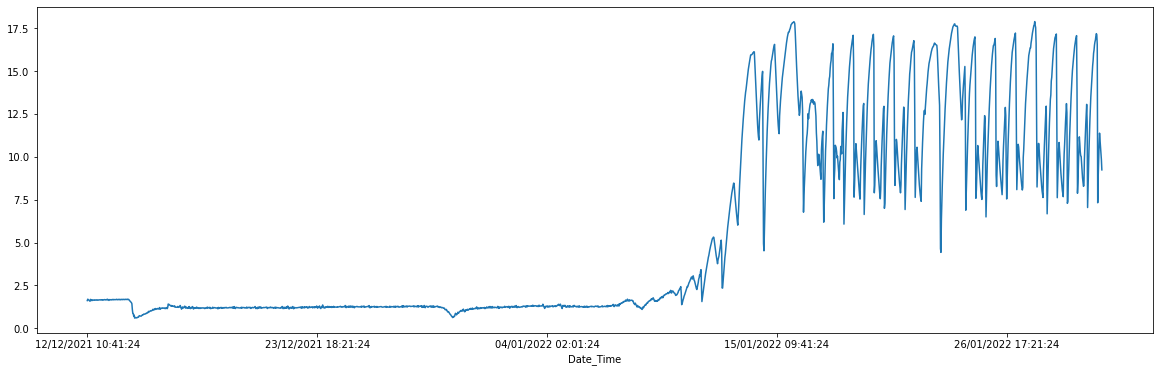

In [70]:
plt.figure(figsize=(20, 6))
FPC11_12_12_21_to_31_01_22_indexed["CO2sys"].plot()
plt.show()

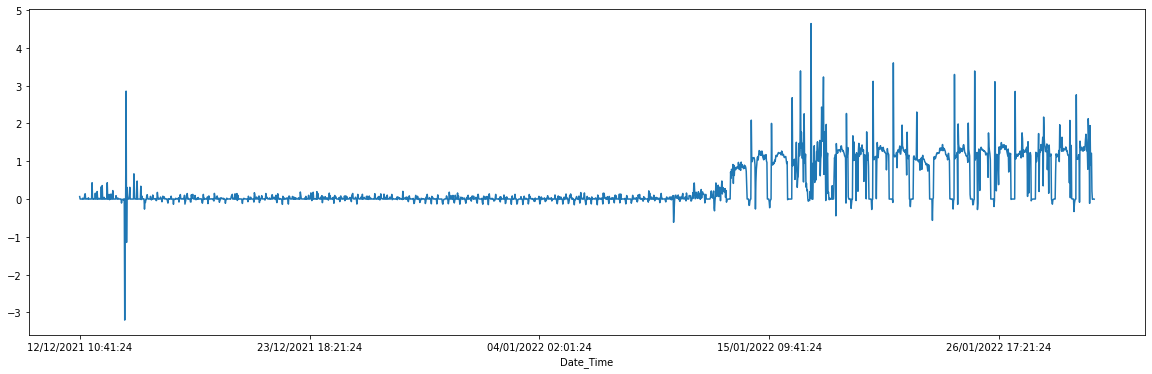

In [71]:
plt.figure(figsize=(20, 6))
FPC11_12_12_21_to_31_01_22_indexed["C_g"].plot()
plt.show()

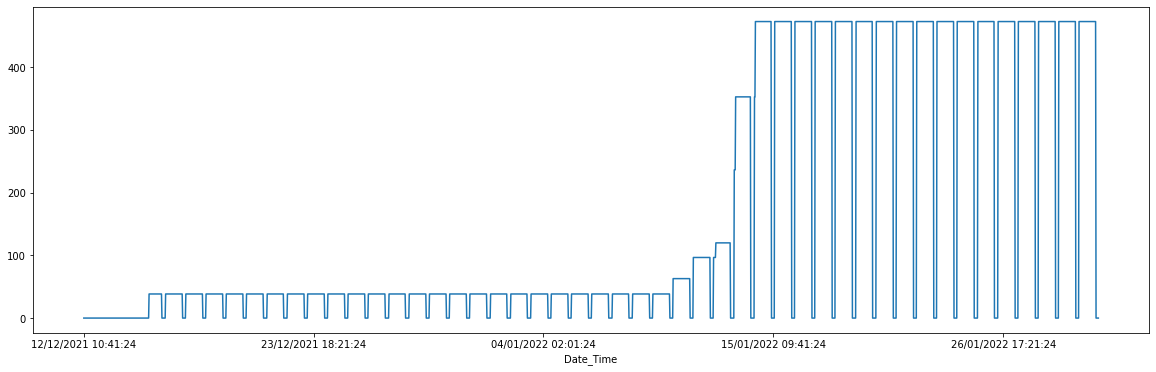

In [69]:
plt.figure(figsize=(20, 6))
FPC11_12_12_21_to_31_01_22_indexed["C_PAR"].plot()
plt.show()

In [ ]:
gdfgfgfd